now we trying the first and basic model: MiDas

In [1]:
import cv2
import torch
import os
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = "images/"   # Can be a single file ("img.jpg") or folder ("images/")
output_folder = "output/"
model_type = "DPT_Large" # this is the most accurate model. Alternatives: "DPT_Hybrid", "MiDaS_small"

# 1. Load MiDaS Model
print(f"Loading {model_type} model...")
midas = torch.hub.load("intel-isl/MiDaS", model_type) # Load the specified MiDaS model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") 
midas.to(device)
midas.eval()

# Load Transforms (Standardizes image size/values for the AI)
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type == "DPT_Large" else midas_transforms.small_transform

# 2. Setup Input List
if os.path.isdir(input_path):
    # It's a folder: get all images
    files = [os.path.join(input_path, f) for f in os.listdir(input_path) 
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    # It's a single file
    files = [input_path]

os.makedirs(output_folder, exist_ok=True)

# 3. Process Each Image
print(f"Processing {len(files)} images on {device}...")

for file_path in files:
    filename = os.path.basename(file_path)
    print(f"  Processing: {filename}...")

    # Load and prep image
    img = cv2.imread(file_path) 
    if img is None: continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    
    input_batch = transform(img_rgb).to(device)

    # Run AI
    with torch.no_grad(): 
        prediction = midas(input_batch)

        # Resize prediction back to original image size
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img_rgb.shape[:2],
            mode="bicubic", # take 16 pixels and calculate the average of the 16 pixels to get the new pixel value
            align_corners=False,
        ).squeeze()

    depth_map = prediction.cpu().numpy()

    # 4. Save Output
    # We use Matplotlib to save it as a colorful heatmap (inferno)
    save_path = os.path.join(output_folder, f"depth_{filename}")
    plt.imsave(save_path, depth_map, cmap='inferno')

print("Done! Check the 'output' folder.")

Loading DPT_Large model...


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Processing 3 images on cpu...
  Processing: Screenshot 2025-11-30 175434.png...
  Processing: Screenshot 2025-11-30 175500.png...
  Processing: Screenshot 2025-11-30 175552.png...
Done! Check the 'output' folder.


<h2 style="text-align: center; border-bottom: 2px solid #0056b3; padding-bottom: 10px;">Original vs. MiDaS (DPT Large)</h2>

<h3 style="text-align: center; margin-top: 30px;">Image 1: Screenshot 175500</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>Original Image (RGB)</h3>
    <p>Screenshot 175500</p>
    <img src="images\Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS Output (DPT Large)</h3>
    <p>Depth Map</p>
    <img src="output\depth_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<h3 style="text-align: center;">Image 2: Screenshot 175434</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>Original Image (RGB)</h3>
    <p>Screenshot 175434</p>
    <img src="images/Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS Output (DPT Large)</h3>
    <p>Depth Map</p>
    <img src="output/depth_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<h3 style="text-align: center;">Image 3: Screenshot 175552</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>Original Image (RGB)</h3>
    <p>Screenshot 175552</p>
    <img src="images/Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS Output (DPT Large)</h3>
    <p>Depth Map</p>
    <img src="output/depth_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

In [ ]:
import cv2
import torch
import os
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = "images/"
output_folder = "output_beit/"
os.makedirs(output_folder, exist_ok=True)

model_type = "DPT_BEiT_L_512" # BEiT model with 512x512 input size

# 1. Load Model
print(f"Loading {model_type} model...")

midas = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

# 2. Load Correct Transform
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.beit512_transform

# 3. Setup Files
if os.path.isdir(input_path):
    files = [os.path.join(input_path, f) for f in os.listdir(input_path) 
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    files = [input_path]

print(f"Processing {len(files)} images on {device}...")

# 4. Process Loop
for file_path in files:
    filename = os.path.basename(file_path)
    print(f"  Processing: {filename}...")

    img = cv2.imread(file_path)
    if img is None: continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # prepare input
    input_batch = transform(img_rgb).to(device)

    with torch.no_grad():
        prediction = midas(input_batch)

        #back to original size
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img_rgb.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    depth_map = prediction.cpu().numpy()

    #save
    save_path = os.path.join(output_folder, f"beit_{filename}")
    plt.imsave(save_path, depth_map, cmap='inferno')

print("Done! Check 'output_beit' folder.")

Loading DPT_BEiT_L_512 model...


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\noams\OneDrive\Desktop\school\final project\Z_Drone_Final_Project_GA\.venv\lib\site-packages\torch\functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4324.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Processing 3 images on cpu...
  Processing: Screenshot 2025-11-30 175434.png...
  Processing: Screenshot 2025-11-30 175500.png...
  Processing: Screenshot 2025-11-30 175552.png...
Done! Check 'output_beit' folder.


<h2 style="text-align: center; border-bottom: 2px solid #0056b3; padding-bottom: 10px;">MiDaS Comparison: DPT Large vs. BEiT 512</h2>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>MiDaS (DPT Large)</h3>
    <p>Screenshot 175500</p>
    <img src="output\depth_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175500</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>MiDaS (DPT Large)</h3>
    <p>Screenshot 175434</p>
    <img src="output\depth_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175434</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>MiDaS (DPT Large)</h3>
    <p>Screenshot 175552</p>
    <img src="output\depth_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175552</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

In [9]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURATION ---
input_path = "images/"        
output_folder = "output_zoe_n/" 
os.makedirs(output_folder, exist_ok=True)

# 1. load ZoeDepth Model
print("Loading ZoeDepth model (ZoeD_N)...")
# ZoeD_N = Indoor/General (NYU), ZoeD_K = Outdoor (KITTI)
# we use N as it is considered stronger and more general, but worth testing K later
repo = "isl-org/ZoeDepth"
model_zoe = torch.hub.load(repo, "ZoeD_N", pretrained=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_zoe = model_zoe.to(device).eval()

# 2. setup files
if os.path.isdir(input_path):
    files = [os.path.join(input_path, f) for f in os.listdir(input_path) 
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    files = [input_path]

print(f"Processing {len(files)} images on {device}...")


for file_path in files:
    filename = os.path.basename(file_path)
    print(f"  Processing: {filename}...")

    # ZoeDepth works with PIL library (not OpenCV)
    try:
        img = Image.open(file_path).convert("RGB")
    except Exception as e:
        print(f"Skipping {filename}: {e}")
        continue
    
    # depth calculation
    with torch.no_grad():
        # the infer_pil function directly returns the processed depth
        depth_tensor = model_zoe.infer_pil(img)
        
        # convert to Numpy array so we can save it
        depth_map = depth_tensor

    # 4. Save Output
    save_path = os.path.join(output_folder, f"zoe_n_{filename}")
    
    # save visual output (heatmap)
    plt.imsave(save_path, depth_map, cmap='inferno') #for better visibility, invert colormap
    
    # quick check: print depth value at image center (in meters)
    center_dist = depth_map[depth_map.shape[0]//2, depth_map.shape[1]//2]
    print(f"    Saved. Center distance approx: {center_dist:.2f} meters")

print("Done! Check 'output_zoe' folder.")

Loading ZoeDepth model (ZoeD_N)...


Using cache found in C:\Users\noams/.cache\torch\hub\isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully
Processing 3 images on cpu...
  Processing: Screenshot 2025-11-30 175434.png...
    Saved. Center distance approx: 3.53 meters
  Processing: Screenshot 2025-11-30 175500.png...
    Saved. Center distance approx: 3.82 meters
  Processing: Screenshot 2025-11-30 175552.png...
    Saved. Center distance approx: 4.60 meters
Done! Check 'output_zoe' folder.


<h2 style="text-align: center; margin-top: 40px; border-bottom: 2px solid #0056b3; padding-bottom: 5px;">(ZoeDepth vs BEiT)</h2>

<div style="display: flex; justify-content: center; gap: 20px; margin-top: 30px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>ZoeDepth (Metric)</h3>
    <p>Screenshot 175500</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175500</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>ZoeDepth (Metric)</h3>
    <p>Screenshot 175434</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175434</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h3>ZoeDepth (Metric)</h3>
    <p>Screenshot 175552</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h3>MiDaS v3.1 (BEiT 512)</h3>
    <p>Screenshot 175552</p>
    <img src="output_beit\beit_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

In [3]:
import torch
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURATION ---
input_path = "images/"
output_folder = "output_zoe_k/" 
os.makedirs(output_folder, exist_ok=True)

# 1. Load ZoeDepth Model (KITTI Version)
print("Loading ZoeDepth model (ZoeD_K for Outdoors)...")
repo = "isl-org/ZoeDepth"
# downloading ZoeD_K: trained on outdoor roads and urban scenery (range up to 80 meters)
model_zoe_k = torch.hub.load(repo, "ZoeD_K", pretrained=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_zoe_k = model_zoe_k.to(device).eval()

# 2. Setup Input List
if os.path.isdir(input_path):
    files = [os.path.join(input_path, f) for f in os.listdir(input_path) 
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    files = [input_path]

print(f"Processing {len(files)} images with ZoeD_K...")

# 3. Process Loop
for file_path in files:
    filename = os.path.basename(file_path)
    print(f"  Processing: {filename}...")

    try:
        img = Image.open(file_path).convert("RGB")
    except Exception as e:
        print(f"Skipping {filename}: {e}")
        continue
    
    with torch.no_grad():
        # compute depth
        depth_tensor = model_zoe_k.infer_pil(img) 
        depth_map = depth_tensor

    # 4. Save Output
    save_path = os.path.join(output_folder, f"zoek_{filename}")
    plt.imsave(save_path, depth_map, cmap='inferno')
    
    # Checking values: note if the numbers here are larger than in ZoeD_N
    center_dist = depth_map[depth_map.shape[0]//2, depth_map.shape[1]//2]
    max_dist = np.max(depth_map)
    print(f"    Saved. Max distance in scene: {max_dist:.2f}m (Center: {center_dist:.2f}m)")

print("Done! Check 'output_zoe_k' folder.")

Loading ZoeDepth model (ZoeD_K for Outdoors)...


Using cache found in C:\Users\noams/.cache\torch\hub\isl-org_ZoeDepth_main


Overwriting config with config_version kitti
img_size [384, 768]


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  768
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt
Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt" to C:\Users\noams/.cache\torch\hub\checkpoints\ZoeD_M12_K.pt


100%|██████████| 1.34G/1.34G [06:27<00:00, 3.73MB/s]


Loaded successfully
Processing 3 images with ZoeD_K...
  Processing: Screenshot 2025-11-30 175434.png...
    Saved. Max distance in scene: 9.62m (Center: 2.60m)
  Processing: Screenshot 2025-11-30 175500.png...
    Saved. Max distance in scene: 9.08m (Center: 1.78m)
  Processing: Screenshot 2025-11-30 175552.png...
    Saved. Max distance in scene: 9.25m (Center: 2.88m)
Done! Check 'output_zoe_k' folder.


<h2 style="text-align: center; border-bottom: 2px solid #0056b3; padding-bottom: 10px;">ZoeDepth Comparison: Indoor (N) vs Outdoor (K)</h2>

<h3 style="text-align: center; margin-top: 30px;">Image 1: Screenshot 175434</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_N (Indoor)</h4>
    <p>Path: output_zoe_N\zoe_NScreenshot...</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_K (Outdoor)</h4>
    <p>Path: output_zoe_k\zoek_Screenshot...</p>
    <img src="output_zoe_k\zoek_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<h3 style="text-align: center;">Image 2: Screenshot 175500</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_N (Indoor)</h4>
    <p>Path: output_zoe_N\zoe_NScreenshot...</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_K (Outdoor)</h4>
    <p>Path: output_zoe_k\zoek_Screenshot...</p>
    <img src="output_zoe_k\zoek_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<hr style="margin: 40px 0;">

<h3 style="text-align: center;">Image 3: Screenshot 175552</h3>
<div style="display: flex; justify-content: center; gap: 20px;">
  
  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_N (Indoor)</h4>
    <p>Path: output_zoe_N\zoe_NScreenshot...</p>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="text-align: center; width: 45%;">
    <h4>ZoeD_K (Outdoor)</h4>
    <p>Path: output_zoe_k\zoek_Screenshot...</p>
    <img src="output_zoe_k\zoek_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<h1 style="text-align: center; border-bottom: 3px solid #0056b3; padding-bottom: 10px;">Depth Estimation Comparison</h1>

<h3 style="background-color: #f0f0f0; padding: 10px; margin-top: 30px; border-left: 5px solid #0056b3;">1. Scene Analysis: Screenshot 175500</h3>

<div style="display: flex; justify-content: space-between; gap: 5px; text-align: center;">
  
  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">Original (RGB)</h5>
    <img src="images\Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (Base)</h5>
    <img src="output\depth_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (BEiT 512)</h5>
    <img src="output_beit\beit_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Indoor)</h5>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Outdoor)</h5>
    <img src="output_zoe_k\zoek_Screenshot 2025-11-30 175500.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<h3 style="background-color: #f0f0f0; padding: 10px; margin-top: 40px; border-left: 5px solid #0056b3;">2. Scene Analysis: Screenshot 175434</h3>

<div style="display: flex; justify-content: space-between; gap: 5px; text-align: center;">
  
  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">Original (RGB)</h5>
    <img src="images/Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (Base)</h5>
    <img src="output/depth_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (BEiT 512)</h5>
    <img src="output_beit/beit_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Indoor)</h5>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Outdoor)</h5>
    <img src="output_zoe_k/zoek_Screenshot 2025-11-30 175434.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

<h3 style="background-color: #f0f0f0; padding: 10px; margin-top: 40px; border-left: 5px solid #0056b3;">3. Scene Analysis: Screenshot 175552</h3>

<div style="display: flex; justify-content: space-between; gap: 5px; text-align: center;">
  
  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">Original (RGB)</h5>
    <img src="images\Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (Base)</h5>
    <img src="output\depth_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">MiDaS (BEiT 512)</h5>
    <img src="output_beit\beit_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Indoor)</h5>
    <img src="output_zoe_n\zoe_n_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

  <div style="width: 19%;">
    <h5 style="margin: 5px 0;">ZoeDepth (Outdoor)</h5>
    <img src="output_zoe_k\zoek_Screenshot 2025-11-30 175552.png" style="width: 100%; border: 1px solid #ccc;">
  </div>

</div>

Comparing models on: images/Screenshot 2025-11-30 175500.png
Running MiDaS...


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Running ZoeDepth...


Using cache found in C:\Users\noams/.cache\torch\hub\isl-org_ZoeDepth_main


Overwriting config with config_version kitti
img_size [384, 768]


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  768
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt
Loaded successfully


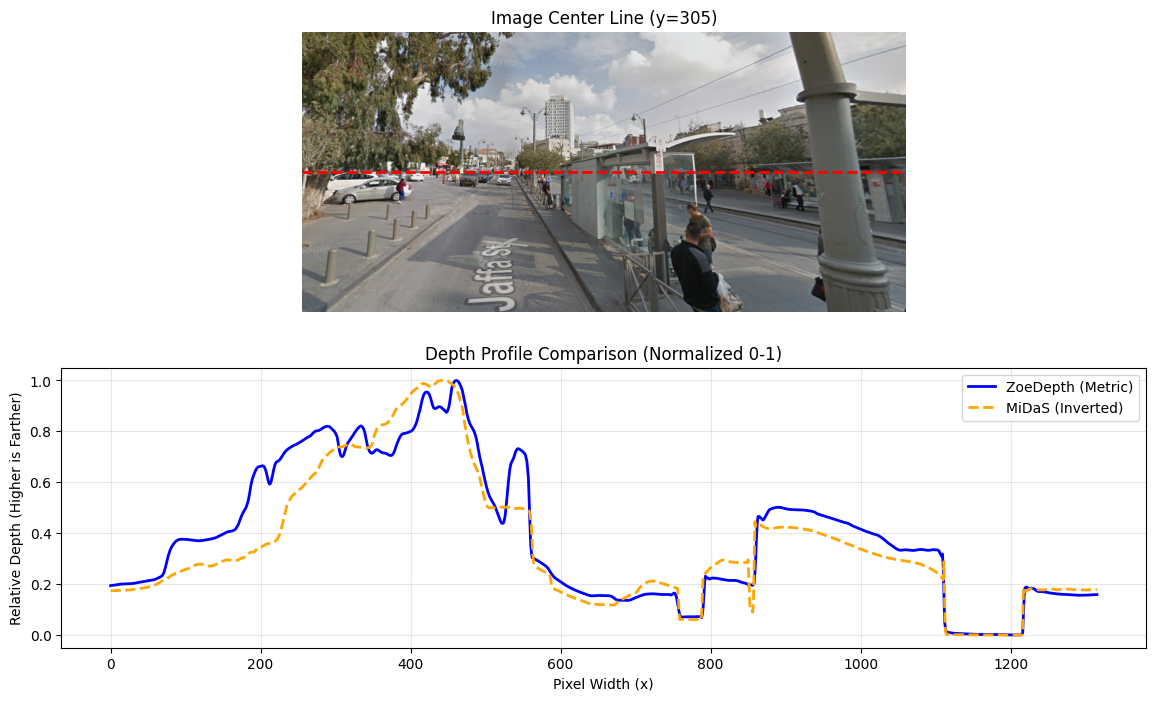

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- הגדרות ---
img_path = "images/Screenshot 2025-11-30 175500.png" # ודא שהתמונה קיימת
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Comparing models on: {img_path}")

# 1. הרצת MiDaS (BEiT)
print("Running MiDaS...")
midas = torch.hub.load("intel-isl/MiDaS", "DPT_BEiT_L_512")
midas.to(device).eval()
transform_midas = torch.hub.load("intel-isl/MiDaS", "transforms").beit512_transform

img_cv2 = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
input_midas = transform_midas(img_rgb).to(device)

with torch.no_grad():
    pred_midas = midas(input_midas)
    pred_midas = torch.nn.functional.interpolate(
        pred_midas.unsqueeze(1), size=img_rgb.shape[:2], mode="bicubic", align_corners=False
    ).squeeze()
    
    # המרה ל-Numpy
    map_midas = pred_midas.cpu().numpy()
    
    # היפוך מתמטי ל-MiDaS כדי שנוכל להשוות (עכשיו גבוה = רחוק, כמו ב-Zoe)
    # מוסיפים אפסילון קטן למנוע חלוקה ב-0
    map_midas_inverted = 1 / (map_midas + 1e-6)

# 2. הרצת ZoeDepth (K)
print("Running ZoeDepth...")
zoe = torch.hub.load("isl-org/ZoeDepth", "ZoeD_K", pretrained=True)
zoe.to(device).eval()

img_pil = Image.open(img_path).convert("RGB")
with torch.no_grad():
    map_zoe = zoe.infer_pil(img_pil) # זה כבר במטרים (גבוה = רחוק)

mid_y = map_zoe.shape[0] // 2
profile_midas = map_midas_inverted[mid_y, :]
profile_zoe = map_zoe[mid_y, :]

# נרמול לטווח 0-1 כדי שיהיו באותו גובה בגרף
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

norm_midas = normalize(profile_midas)
norm_zoe = normalize(profile_zoe)

# --- ציור הגרף ---
plt.figure(figsize=(14, 8))

# תמונה עליונה: איפה עבר הקו?
plt.subplot(2, 1, 1)
plt.imshow(img_rgb)
plt.axhline(y=mid_y, color='r', linestyle='--', linewidth=2)
plt.title(f"Image Center Line (y={mid_y})")
plt.axis('off')

# גרף תחתון: השוואת העומק
plt.subplot(2, 1, 2)
plt.plot(norm_zoe, label='ZoeDepth (Metric)', color='blue', linewidth=2)
plt.plot(norm_midas, label='MiDaS (Inverted)', color='orange', linestyle='--', linewidth=2)

plt.title("Depth Profile Comparison (Normalized 0-1)")
plt.xlabel("Pixel Width (x)")
plt.ylabel("Relative Depth (Higher is Farther)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
import cv2
import torch
import os
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
input_path = "images/"   # Can be a single file ("img.jpg") or folder ("images/")
output_folder = "outputTemp/"
model_type = "DPT_Large" # this is the most accurate model. Alternatives: "DPT_Hybrid", "MiDaS_small"

# 1. Load MiDaS Model
print(f"Loading {model_type} model...")
midas = torch.hub.load("intel-isl/MiDaS", model_type) # Load the specified MiDaS model
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") 
midas.to(device)
midas.eval()

# Load Transforms (Standardizes image size/values for the AI)
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.dpt_transform if model_type == "DPT_Large" else midas_transforms.small_transform

# 2. Setup Input List
if os.path.isdir(input_path):
    # It's a folder: get all images
    files = [os.path.join(input_path, f) for f in os.listdir(input_path) 
             if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    # It's a single file
    files = [input_path]

os.makedirs(output_folder, exist_ok=True)

# 3. Process Each Image
print(f"Processing {len(files)} images on {device}...")

for file_path in files:
    filename = os.path.basename(file_path)
    print(f"  Processing: {filename}...")

    # Load and prep image
    img = cv2.imread(file_path) 
    if img is None: continue
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    
    input_batch = transform(img_rgb).to(device)

    # Run AI
    with torch.no_grad(): 
        prediction = midas(input_batch)

        # Resize prediction back to original image size
        prediction = torch.nn.functional.interpolate(
            size=img_rgb.shape[:2],
            mode="linear", # take 16 pixels and calculate the average of the 16 pixels to get the new pixel value
            align_corners=False,
        ).squeeze()

    depth_map = prediction.cpu().numpy()

    # 4. Save Output
    # We use Matplotlib to save it as a colorful heatmap (inferno)
    save_path = os.path.join(output_folder, f"depth_{filename}")
    plt.imsave(save_path, depth_map, cmap='inferno')

print("Done! Check the 'output' folder.")

Loading DPT_Large model...


Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\noams/.cache\torch\hub\intel-isl_MiDaS_master


Processing 3 images on cpu...
  Processing: Screenshot 2025-11-30 175434.png...


NotImplementedError: Got 4D input, but linear mode needs 3D input